## Importing Packages

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.nn import sigmoid

2024-10-01 14:23:27.397372: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-01 14:23:29.223076: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


#### Helper Functions

In [5]:
def detect_outliers(column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5*IQR
    upper_limit = Q3 + 1.5*IQR
    outliers = (data[column] < lower_limit) | (data[column] > upper_limit)
    return outliers

## -------------------------------------------------------------------------------------------------------

## Reading the CSV File

In [6]:
data = pd.read_csv("../data/first inten project.csv")
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space    room type  \
0                      5   Meal Plan 1                  0  Room_Type 1   
1                      3  Not Selected                  0  Room_Type 1   
2                      3   Meal Plan 1                  0  Room_Type 1   
3                      2   Meal Plan 1                  0  Room_Type 1   
4                      2  Not Selected                  0  Room_Type 1   

   lead time market segment type  repeated  P-C  P-not-C  average price   \
0        224             Offline         0    0        0           88.00   
1          5              Online         0    0        0          106.68   
2          1              Online         0    0        0           50.00   
3        211              Online         0    0        0          100.00   
4         48              Online         0    0        0           77.00   

   special requests date of reservation booking status  
0                 0           10/2/2015   Not_Canceled  
1                 1           11/6/2018   Not_Canceled  
2                 0           2/28/2018       Canceled  
3                 1           5/20/2017       Canceled  
4                 0           4/11/2018       Canceled

In [7]:
len(data)

36285

## -------------------------------------------------------------------------------------------------------

### Checking "number of adults" Feature

In [8]:
column = "number of adults"

In [9]:
data[column].describe()

count    36285.000000
mean         1.844839
std          0.518813
min          0.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          4.000000
Name: number of adults, dtype: float64

In [10]:
data[column].value_counts()

number of adults
2    26110
1     7702
3     2318
0      139
4       16
Name: count, dtype: int64

In [11]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of adults'>

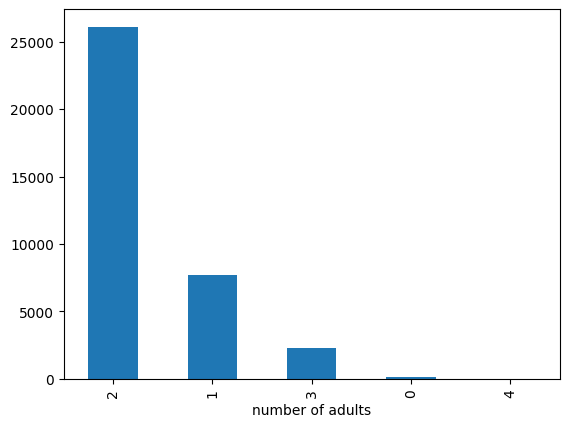

In [12]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of children" Feature

In [13]:
column = "number of children"

In [14]:
data[column].describe()

count    36285.000000
mean         0.105360
std          0.402704
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         10.000000
Name: number of children, dtype: float64

In [15]:
data[column].value_counts()

number of children
0     33583
1      1622
2      1058
3        19
9         2
10        1
Name: count, dtype: int64

In [16]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of children'>

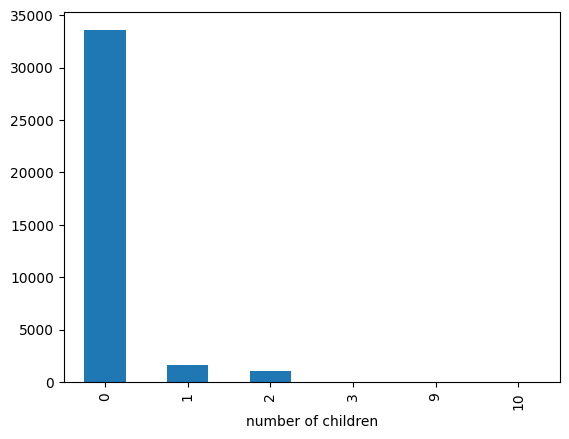

In [17]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of weekend nights" Feature

In [18]:
column = "number of weekend nights"

In [19]:
data[column].describe()

count    36285.000000
mean         0.810693
std          0.870590
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max          7.000000
Name: number of weekend nights, dtype: float64

In [20]:
data[column].value_counts()

number of weekend nights
0    16876
1    10000
2     9072
3      153
4      129
5       34
6       20
7        1
Name: count, dtype: int64

In [21]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of weekend nights'>

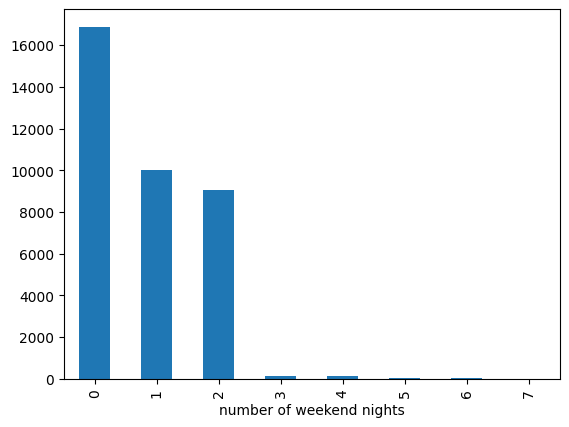

In [22]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "number of week nights" Feature

In [23]:
column = "number of week nights"

In [24]:
data[column].describe()

count    36285.000000
mean         2.204602
std          1.410946
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         17.000000
Name: number of week nights, dtype: float64

In [25]:
data[column].value_counts()

number of week nights
2     11447
1      9488
3      7842
4      2992
0      2387
5      1616
6       189
7       113
10       62
8        62
9        34
11       17
15       10
12        9
14        7
13        5
17        3
16        2
Name: count, dtype: int64

In [26]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='number of week nights'>

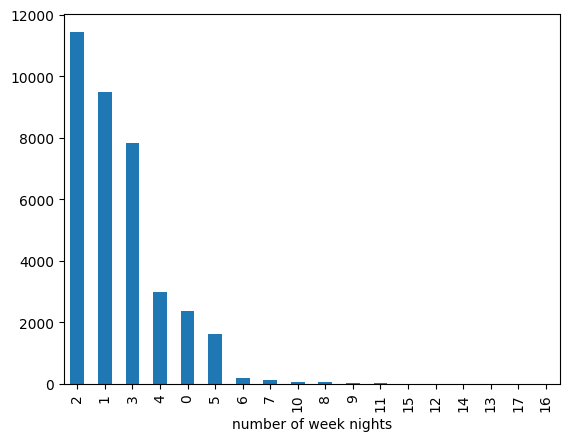

In [27]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "type of meal" Feature

In [28]:
column = "type of meal"

In [29]:
data[column].describe()

count           36285
unique              4
top       Meal Plan 1
freq            27842
Name: type of meal, dtype: object

In [30]:
data[column].value_counts()

type of meal
Meal Plan 1     27842
Not Selected     5132
Meal Plan 2      3306
Meal Plan 3         5
Name: count, dtype: int64

In [31]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='type of meal'>

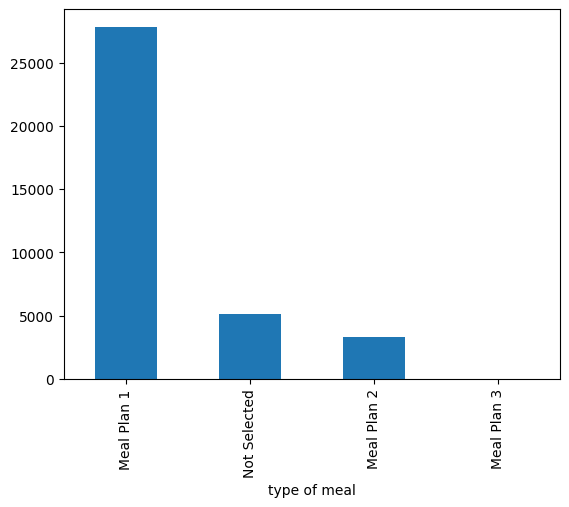

In [32]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [33]:
# Not Selected ...> 0
# Meal Plan 1  ...> 1
# Meal Plan 2  ...> 2
# Meal Plan 3  ...> 3

In [34]:
data[column] = data[column].replace("Not Selected", 0)
data[column] = data[column].replace("Meal Plan 1", 1)
data[column] = data[column].replace("Meal Plan 2", 2)
data[column] = data[column].replace("Meal Plan 3", 3)

/tmp/ipykernel_68245/1547429505.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Meal Plan 3", 3)


In [35]:
data[column].value_counts()

type of meal
1    27842
0     5132
2     3306
3        5
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "car parking space" Feature

In [36]:
column = "car parking space"

In [37]:
data[column].describe()

count    36285.000000
mean         0.030977
std          0.173258
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: car parking space, dtype: float64

In [38]:
data[column].value_counts()

car parking space
0    35161
1     1124
Name: count, dtype: int64

In [39]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='car parking space'>

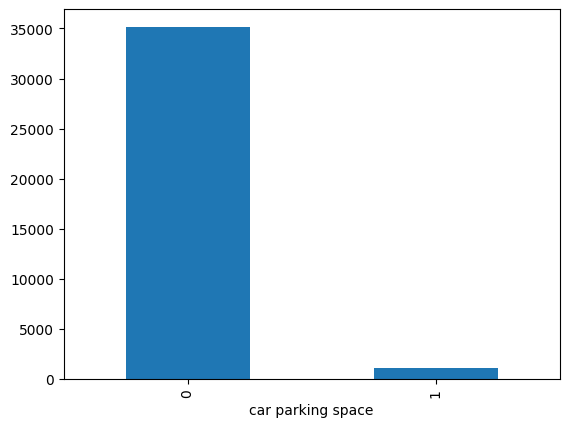

In [40]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "room type" Feature

In [41]:
column = "room type"

In [42]:
data[column].describe()

count           36285
unique              7
top       Room_Type 1
freq            28138
Name: room type, dtype: object

In [43]:
data[column].value_counts()

room type
Room_Type 1    28138
Room_Type 4     6059
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64

In [44]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='room type'>

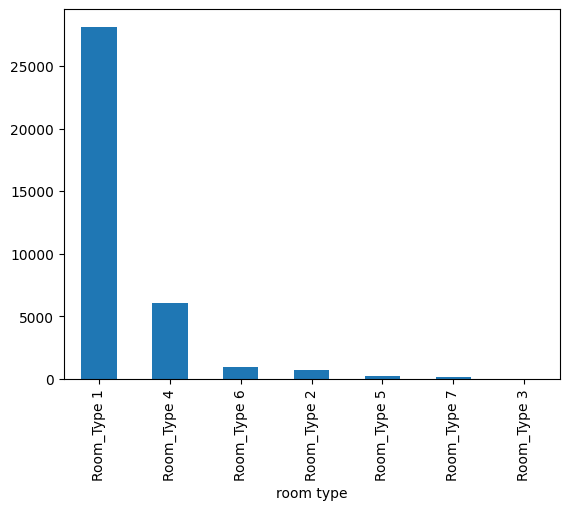

In [45]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [46]:
# Room_Type 1  ...> 0
# Room_Type 2  ...> 1
# Room_Type 3  ...> 2
# Room_Type 4  ...> 3
# Room_Type 5  ...> 4
# Room_Type 6  ...> 5
# Room_Type 7  ...> 6

In [47]:
data[column] = data[column].replace("Room_Type 1", 0)
data[column] = data[column].replace("Room_Type 2", 1)
data[column] = data[column].replace("Room_Type 3", 2)
data[column] = data[column].replace("Room_Type 4", 3)
data[column] = data[column].replace("Room_Type 5", 4)
data[column] = data[column].replace("Room_Type 6", 5)
data[column] = data[column].replace("Room_Type 7", 6)

/tmp/ipykernel_68245/4244024858.py:7: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Room_Type 7", 6)


In [48]:
data[column].value_counts()

room type
0    28138
3     6059
5      966
1      692
4      265
6      158
2        7
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "lead time" Feature

In [49]:
column = "lead time"

In [50]:
data[column].describe()

count    36285.000000
mean        85.239851
std         85.938796
min          0.000000
25%         17.000000
50%         57.000000
75%        126.000000
max        443.000000
Name: lead time, dtype: float64

In [51]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='lead time', ylabel='Count'>

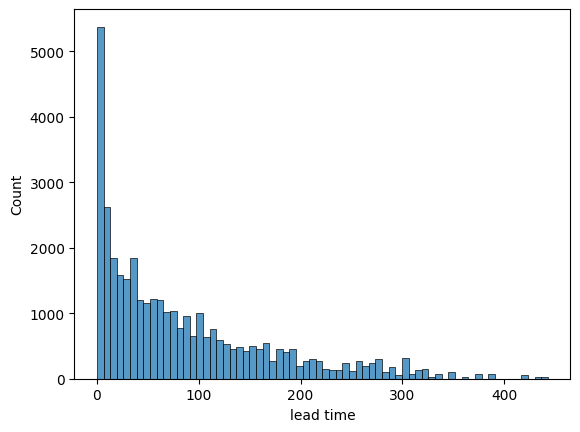

In [52]:
sns.histplot(data[column], kde=False)

<Axes: xlabel='lead time'>

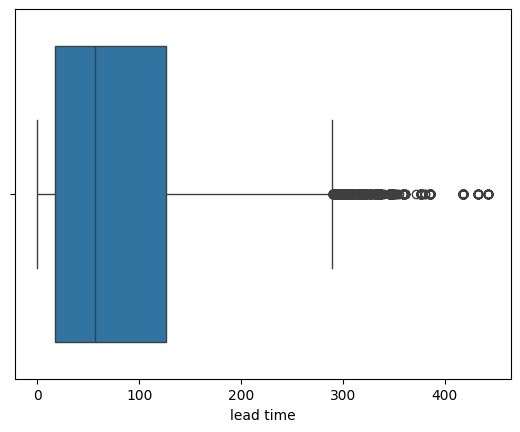

In [53]:
sns.boxplot(data[column], orient="h")

In [54]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1332


- I will not remove/replace the outliers because higher values for lead time may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "market segment type" Feature

In [55]:
column = "market segment type"

In [56]:
data[column].describe()

count      36285
unique         5
top       Online
freq       23221
Name: market segment type, dtype: object

In [57]:
data[column].value_counts()

market segment type
Online           23221
Offline          10531
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64

In [58]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='market segment type'>

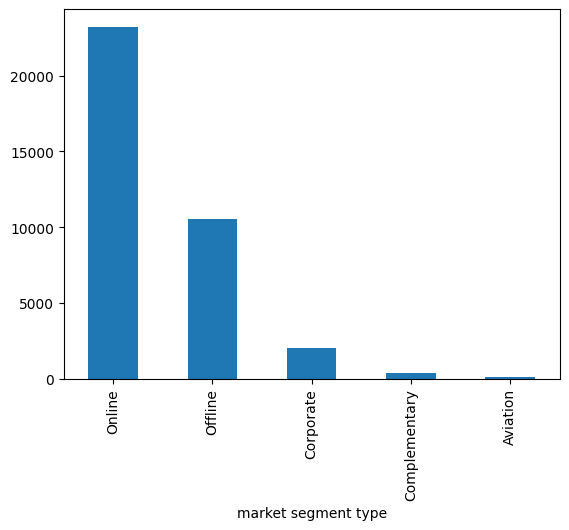

In [59]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [60]:
# Online         ...> 0
# Offline        ...> 1
# Corporate      ...> 2
# Complementary  ...> 3
# Aviation       ...> 4

In [61]:
data[column] = data[column].replace("Online", 0)
data[column] = data[column].replace("Offline", 1)
data[column] = data[column].replace("Corporate", 2)
data[column] = data[column].replace("Complementary", 3)
data[column] = data[column].replace("Aviation", 4)

/tmp/ipykernel_68245/1028570482.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Aviation", 4)


In [62]:
data[column].value_counts()

market segment type
0    23221
1    10531
2     2017
3      391
4      125
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

### Checking "repeated" Feature

In [63]:
column = "repeated"

In [64]:
data[column].describe()

count    36285.000000
mean         0.025630
std          0.158032
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: repeated, dtype: float64

In [65]:
data[column].value_counts()

repeated
0    35355
1      930
Name: count, dtype: int64

In [66]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='repeated'>

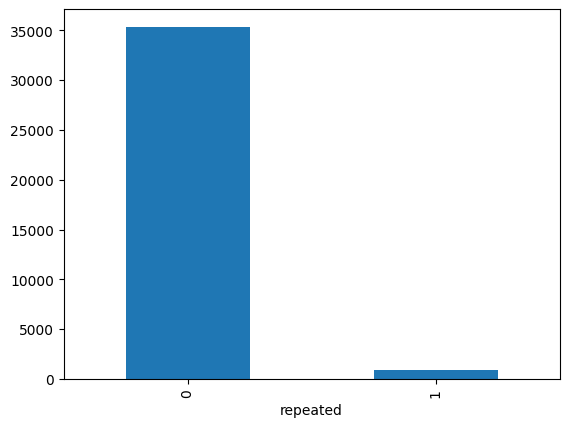

In [67]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-C" Feature

In [68]:
column = "P-C"

In [69]:
data[column].describe()

count    36285.000000
mean         0.023343
std          0.368281
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         13.000000
Name: P-C, dtype: float64

In [70]:
data[column].value_counts()

P-C
0     35947
1       198
2        46
3        43
11       25
5        11
4        10
13        4
6         1
Name: count, dtype: int64

In [71]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='P-C'>

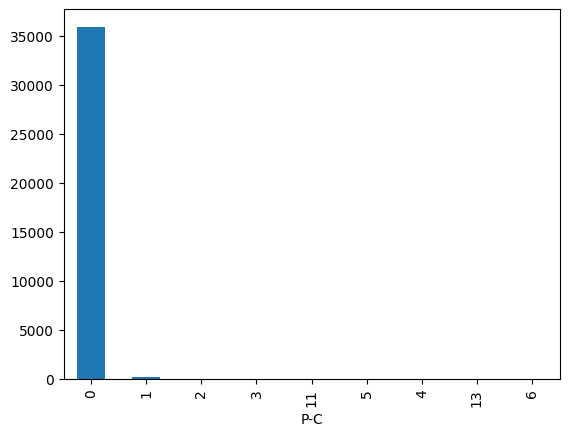

In [72]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "P-not-C" Feature

In [73]:
column = "P-not-C"

In [74]:
data[column].describe()

count    36285.000000
mean         0.153369
std          1.753931
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         58.000000
Name: P-not-C, dtype: float64

In [75]:
data[column].value_counts()

P-not-C
0     35473
1       228
2       112
3        80
4        65
5        60
6        36
7        24
8        23
10       19
9        19
11       15
12       12
14        9
15        8
16        7
13        7
18        6
20        6
21        6
17        6
19        6
22        6
25        3
27        3
24        3
23        3
44        2
29        2
48        2
28        2
30        2
32        2
31        2
26        2
46        1
55        1
45        1
57        1
53        1
54        1
58        1
41        1
40        1
43        1
35        1
50        1
56        1
33        1
37        1
42        1
51        1
38        1
34        1
39        1
52        1
49        1
47        1
36        1
Name: count, dtype: int64

In [76]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


In [77]:
#data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "average price" Feature

In [78]:
column = "average price "

In [79]:
data[column].describe()

count    36285.000000
mean       103.421636
std         35.086469
min          0.000000
25%         80.300000
50%         99.450000
75%        120.000000
max        540.000000
Name: average price , dtype: float64

In [80]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='average price ', ylabel='Count'>

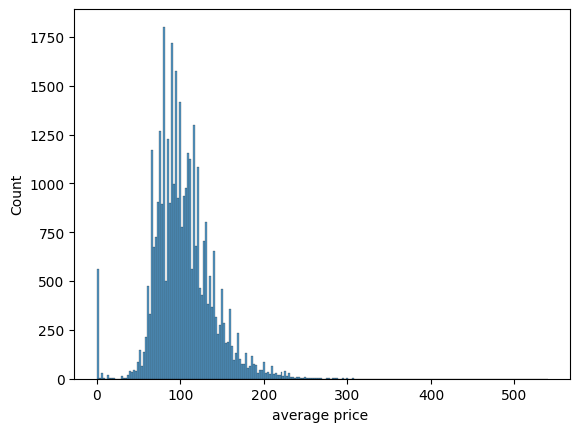

In [81]:
sns.histplot(data[column], kde=False)

<Axes: xlabel='average price '>

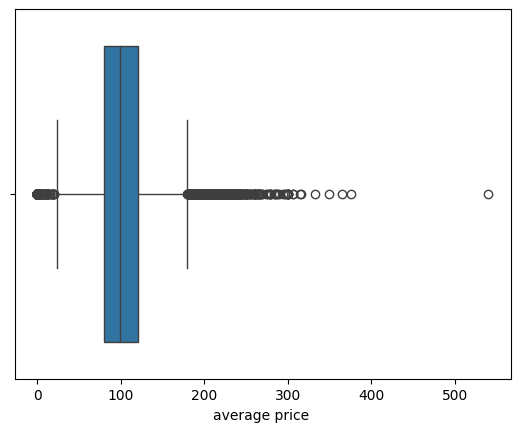

In [82]:
sns.boxplot(data[column], orient="h")

In [83]:
outliers = detect_outliers(column)
print(f"Number of outliers:", np.sum(outliers))

Number of outliers: 1696


- I will not remove/replace the outliers because higher values for the average price may have an impact on the booking status

## -------------------------------------------------------------------------------------------------------

### Checking "special requests" Feature

In [84]:
column = "special requests"

In [85]:
data[column].describe()

count    36285.000000
mean         0.619733
std          0.786262
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          5.000000
Name: special requests, dtype: float64

In [86]:
data[column].value_counts()

special requests
0    19780
1    11379
2     4364
3      676
4       78
5        8
Name: count, dtype: int64

In [87]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='special requests'>

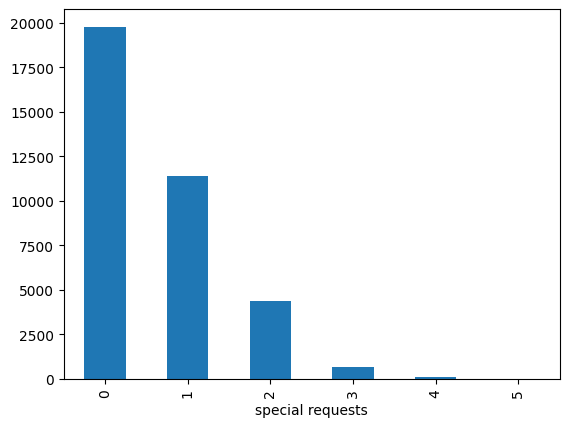

In [88]:
data[column].value_counts().plot(kind="bar")

## -------------------------------------------------------------------------------------------------------

### Checking "booking status" 

In [89]:
column = "booking status"

In [90]:
data[column].describe()

count            36285
unique               2
top       Not_Canceled
freq             24396
Name: booking status, dtype: object

In [91]:
data[column].value_counts()

booking status
Not_Canceled    24396
Canceled        11889
Name: count, dtype: int64

In [92]:
null = np.sum(data[column].isnull())
print(f"There are {null} null values.")

There are 0 null values.


<Axes: xlabel='booking status'>

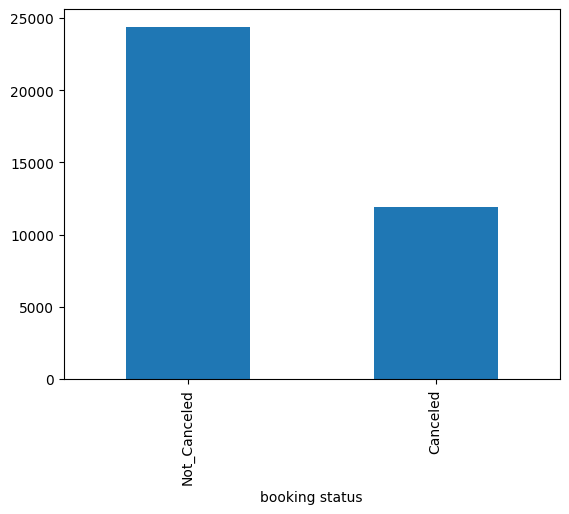

In [93]:
data[column].value_counts().plot(kind='bar')

##### Do one hot encoding for this categorical feature

In [94]:
# Not_Canceled  ...> 0
# Canceled      ...> 1

In [95]:
data[column] = data[column].replace("Not_Canceled", 0)
data[column] = data[column].replace("Canceled", 1)

/tmp/ipykernel_68245/4098707111.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[column] = data[column].replace("Canceled", 1)


In [96]:
data[column].value_counts()

booking status
0    24396
1    11889
Name: count, dtype: int64

## -------------------------------------------------------------------------------------------------------

## Checking the relationship between Categorical Features and Average Price

- You may ignore this section

In [97]:
def plot(x, y):
    sns.stripplot(x=x, y=y, data=data, jitter=True)
    plt.xticks(rotation=45)  # Rotate x labels for better readability
    plt.show()

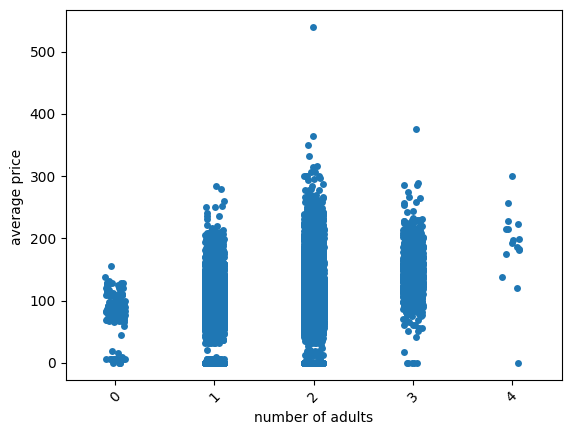

In [98]:
x = "number of adults"
y = "average price "
plot(x, y)

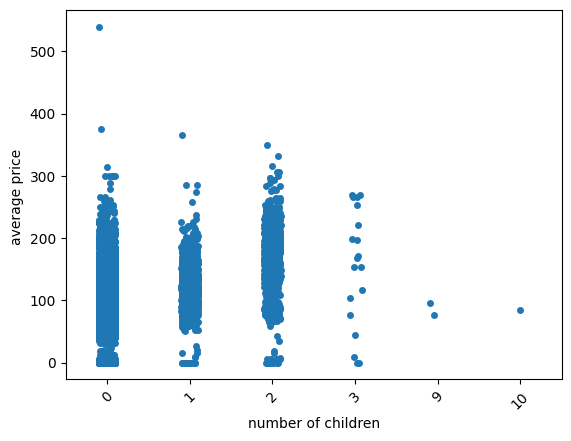

In [99]:
x = "number of children"
y = "average price "
plot(x, y)

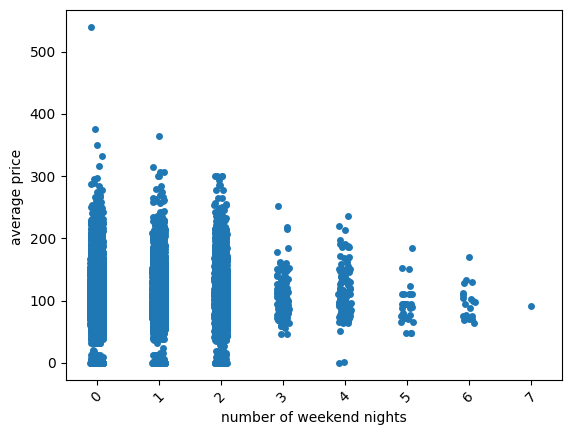

In [100]:
x = "number of weekend nights"
y = "average price "
plot(x, y)

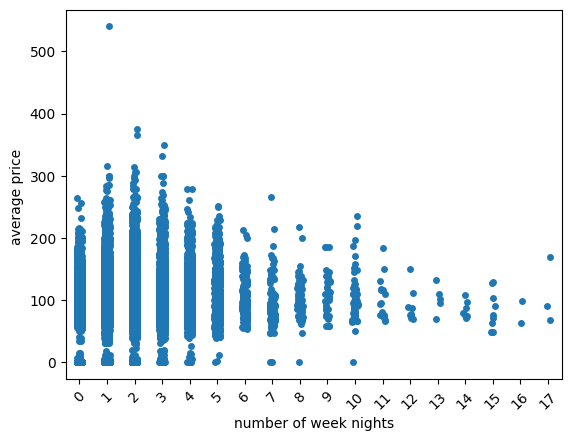

In [101]:
x = "number of week nights"
y = "average price "
plot(x, y)

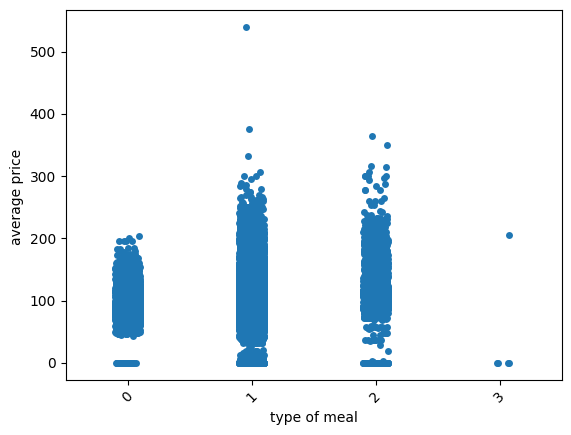

In [102]:
x = "type of meal"
y = "average price "
plot(x, y)

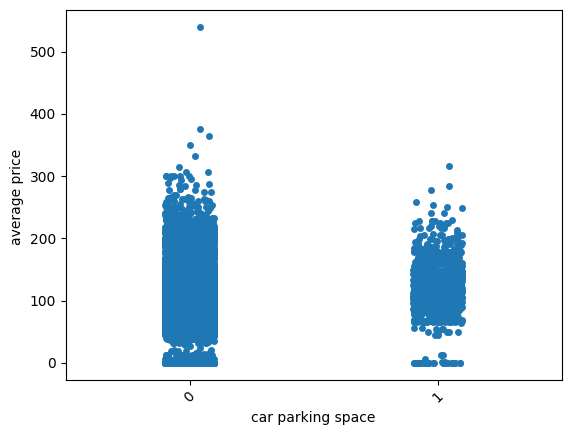

In [103]:
x = "car parking space"
y = "average price "
plot(x, y)

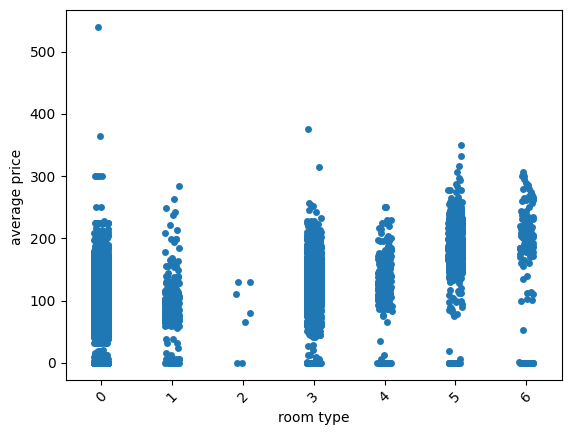

In [104]:
x = "room type"
y = "average price "
plot(x, y)

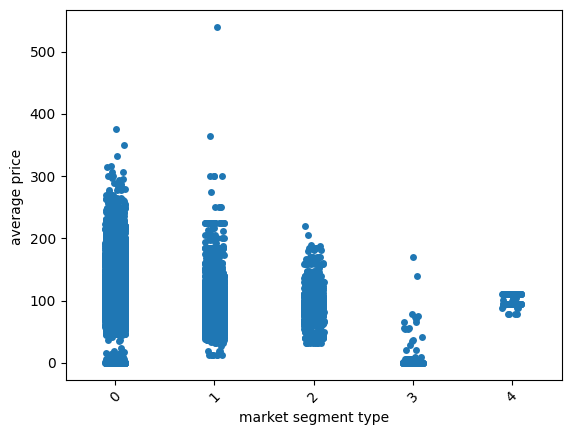

In [105]:
x = "market segment type"
y = "average price "
plot(x, y)

#### Comments
- The analysis suggests that average price does not exhibit a linear relationship with the individual categorical features examined. For instance, changes in the number of nights or the number of children do not appear to significantly affect the average price.
- Specifically, increasing the number of nights booked or the number of children does not show a corresponding change in the average price.
- I believe that average price may be influenced by a combination of features working together rather than any single feature individually. It is likely that the interplay between multiple variables contributes to variations in average price.

## -------------------------------------------------------------------------------------------------------

#### Combining the "number of week nights" and "number of weekend nights" into one Feature

In [106]:
data["total nights"] = data["number of week nights"] + data["number of weekend nights"]

#### Extract the Feature "month" and the Feature "day" from the "date of reservation"

In [107]:
data["date of reservation"] = data["date of reservation"].replace('2018-2-29', '2/28/2018')
data["date of reservation"] = pd.to_datetime(data["date of reservation"], format="%m/%d/%Y", errors="coerce")
data["month"] = data["date of reservation"].dt.month
data["day"] = data["date of reservation"].dt.day

In [108]:
data.head()

Booking_ID  number of adults  number of children  number of weekend nights  \
0   INN00001                 1                   1                         2   
1   INN00002                 1                   0                         1   
2   INN00003                 2                   1                         1   
3   INN00004                 1                   0                         0   
4   INN00005                 1                   0                         1   

   number of week nights  type of meal  car parking space  room type  \
0                      5             1                  0          0   
1                      3             0                  0          0   
2                      3             1                  0          0   
3                      2             1                  0          0   
4                      2             0                  0          0   

   lead time  market segment type  repeated  P-C  P-not-C  average price   \
0        224                    1         0    0        0           88.00   
1          5                    0         0    0        0          106.68   
2          1                    0         0    0        0           50.00   
3        211                    0         0    0        0          100.00   
4         48                    0         0    0        0           77.00   

   special requests date of reservation  booking status  total nights  month  \
0                 0          2015-10-02               0             7     10   
1                 1          2018-11-06               0             4     11   
2                 0          2018-02-28               1             4      2   
3                 1          2017-05-20               1             2      5   
4                 0          2018-04-11               1             3      4   

   day  
0    2  
1    6  
2   28  
3   20  
4   11

## -------------------------------------------------------------------------------------------------------

#### Dropping Unnecessary Features

In [109]:
data.drop(columns=["Booking_ID", "date of reservation", "number of weekend nights", "number of week nights"], inplace=True)

In [110]:
data.head()

number of adults  number of children  type of meal  car parking space  \
0                 1                   1             1                  0   
1                 1                   0             0                  0   
2                 2                   1             1                  0   
3                 1                   0             1                  0   
4                 1                   0             0                  0   

   room type  lead time  market segment type  repeated  P-C  P-not-C  \
0          0        224                    1         0    0        0   
1          0          5                    0         0    0        0   
2          0          1                    0         0    0        0   
3          0        211                    0         0    0        0   
4          0         48                    0         0    0        0   

   average price   special requests  booking status  total nights  month  day  
0           88.00                 0               0             7     10    2  
1          106.68                 1               0             4     11    6  
2           50.00                 0               1             4      2   28  
3          100.00                 1               1             2      5   20  
4           77.00                 0               1             3      4   11

## -------------------------------------------------------------------------------------------------------

## Feature Scaling 

In [111]:
# from sklearn.preprocessing import MinMaxScaler

# # Initialize the MinMaxScaler
# scaler = MinMaxScaler()

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

In [112]:
features = ["average price ", "lead time", "P-not-C", "total nights"]

In [113]:
for feature in features:
    data[feature] = scaler.fit_transform(data[[feature]])

In [114]:
#data["average price "] = np.log(data["average price "] + 0.001)

In [115]:
#data["lead time"] = np.log(data["lead time"] + 0.001)

In [116]:
data.head()

number of adults  number of children  type of meal  car parking space  \
0                 1                   1             1                  0   
1                 1                   0             0                  0   
2                 2                   1             1                  0   
3                 1                   0             1                  0   
4                 1                   0             0                  0   

   room type  lead time  market segment type  repeated  P-C   P-not-C  \
0          0   1.614661                    1         0    0 -0.087444   
1          0  -0.933699                    0         0    0 -0.087444   
2          0  -0.980244                    0         0    0 -0.087444   
3          0   1.463389                    0         0    0 -0.087444   
4          0  -0.433336                    0         0    0 -0.087444   

   average price   special requests  booking status  total nights  month  day  
0       -0.439538                 0               0      2.231109     10    2  
1        0.092868                 1               0      0.551354     11    6  
2       -1.522592                 0               1      0.551354      2   28  
3       -0.097521                 1               1     -0.568483      5   20  
4       -0.753054                 0               1     -0.008564      4   11

In [117]:
data.describe()

number of adults  number of children  type of meal  car parking space  \
count      36285.000000        36285.000000  36285.000000       36285.000000   
mean           1.844839            0.105360      0.949952           0.030977   
std            0.518813            0.402704      0.480209           0.173258   
min            0.000000            0.000000      0.000000           0.000000   
25%            2.000000            0.000000      1.000000           0.000000   
50%            2.000000            0.000000      1.000000           0.000000   
75%            2.000000            0.000000      1.000000           0.000000   
max            4.000000           10.000000      3.000000           1.000000   

          room type     lead time  market segment type      repeated  \
count  36285.000000  3.628500e+04         36285.000000  36285.000000   
mean       0.708860  1.684075e-17             0.447513      0.025630   
std        1.399801  1.000014e+00             0.681489      0.158032   
min        0.000000 -9.918806e-01             0.000000      0.000000   
25%        0.000000 -7.940627e-01             0.000000      0.000000   
50%        0.000000 -3.286088e-01             0.000000      0.000000   
75%        0.000000  4.742993e-01             1.000000      0.000000   
max        6.000000  4.163022e+00             4.000000      1.000000   

                P-C       P-not-C  average price   special requests  \
count  36285.000000  3.628500e+04    3.628500e+04      36285.000000   
mean       0.023343  2.996088e-17    4.343348e-16          0.619733   
std        0.368281  1.000014e+00    1.000014e+00          0.786262   
min        0.000000 -8.744431e-02   -2.947662e+00          0.000000   
25%        0.000000 -8.744431e-02   -6.589992e-01          0.000000   
50%        0.000000 -8.744431e-02   -1.131972e-01          0.000000   
75%        0.000000 -8.744431e-02    4.725067e-01          1.000000   
max       13.000000  3.298159e+01    1.244310e+01          5.000000   

       booking status  total nights         month           day  
count    36285.000000  3.628500e+04  36285.000000  36285.000000  
mean         0.327656 -8.028731e-17      7.423811     15.595673  
std          0.469365  1.000014e+00      3.069935      8.738817  
min          0.000000 -1.688319e+00      1.000000      1.000000  
25%          0.000000 -5.684825e-01      5.000000      8.000000  
50%          0.000000 -8.564272e-03      8.000000     16.000000  
75%          1.000000  5.513540e-01     10.000000     23.000000  
max          1.000000  1.174972e+01     12.000000     31.000000

In [118]:
#data['average price '] = scaler.fit_transform(data[['average price ']])

## -------------------------------------------------------------------------------------------------------

## Split Data into Train and Test Sets

In [119]:
# Separate the features (X) and the target variable (y)
X = data.drop(columns=["booking status"])
y = data["booking status"]

# Split the dataset (80% train, 20% test is typical)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
print("Shape of X_train", X_train.shape)
print("Shape of y_train", y_train.shape)
print("Shape of X_test", X_test.shape)
print("Shape of y_test", y_test.shape)

Shape of X_train (29028, 15)
Shape of y_train (29028,)
Shape of X_test (7257, 15)
Shape of y_test (7257,)


## -------------------------------------------------------------------------------------------------------

## Fit the Data using LR

In [122]:
model = Sequential(
    [
        Dense(10, activation="linear"),
        Dense(1, activation="sigmoid"),
    ]
)

In [123]:
model.compile(loss="binary_crossentropy", optimizer=SGD(learning_rate=0.001), metrics=["accuracy"])

2024-10-01 14:23:49.728434: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:998] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-01 14:23:49.893221: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2251] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [124]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6219 - loss: 0.7277
Epoch 2/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 864us/step - accuracy: 0.6750 - loss: 0.6066
Epoch 3/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 850us/step - accuracy: 0.7086 - loss: 0.5511
Epoch 4/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 836us/step - accuracy: 0.7348 - loss: 0.5258
Epoch 5/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 792us/step - accuracy: 0.7560 - loss: 0.4979
Epoch 6/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 825us/step - accuracy: 0.7670 - loss: 0.4855
Epoch 7/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7703 - loss: 0.4779
Epoch 8/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 861us/step - accuracy: 0.7728 - loss: 0.4723
Epoch 9/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.7816 - loss: 0.4643
Epoch 10/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 865us/step - accuracy: 0.7877 - loss: 0.4591
Epoch 11/20
908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 858us/step - accuracy: 0.7843 - loss: 0.4577
Epoch 12/20
908/908 ━━━━━━━━━━━━

##### Accuracy on Training Data

In [125]:
train_loss, train_acc = model.evaluate(X_train, y_train)

908/908 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - accuracy: 0.7912 - loss: 0.4472


##### Accuracy on Test Data

In [126]:
test_loss, test_acc = model.evaluate(X_test, y_test)

227/227 ━━━━━━━━━━━━━━━━━━━━ 0s 714us/step - accuracy: 0.8006 - loss: 0.4365


#### Comments
- One layer - One neuron:
    - 10 Epochs, lr=0.001: 46% train data, 45% test data
    - 20 Epochs, lr=0.001: 79% train data, 80% test data
    - 30 Epochs, lr=0.001: 79% train data, 80% test data
 
 
- Two layers - One neuron:
    - 10 Epochs, lr=0.001: 75% train data, 75% test data
    - 20 Epochs, lr=0.001: 67% train data, 67% test data
    - 20 Epochs, lr=0.0001: 71% train data, 71% test data
    - 30 Epochs, lr=0.0001: 67% train data, 66% test data

- Two layers - (10 neurons - One neuron):
    - 10 Epochs, lr=0.001: 78% train data, 79% test data
    - 20 Epochs, lr=0.001: 79% train data, 80% test data
    - 30 Epochs, lr=0.001: 80% train data, 80% test data

In [134]:
model.save('model.h5')

## -------------------------------------------------------------------------------------------------------

## Flask APP

In [139]:
from flask import Flask, render_template, request
import numpy as np
import joblib
from tensorflow.keras.models import load_model


app = Flask(__name__)

model = load_model("model.h5")

# Feature encoding dictionaries
meal_plan_dict = {"Not Selected": 0, "Meal Plan 1": 1, "Meal Plan 2": 2, "Meal Plan 3": 3}
room_type_dict = {
    "Room_Type 1": 0, "Room_Type 2": 1, "Room_Type 3": 2,
    "Room_Type 4": 3, "Room_Type 5": 4, "Room_Type 6": 5, "Room_Type 7": 6
}
market_segment_dict = {
    "Online": 0, "Offline": 1, "Corporate": 2, "Complementary": 3, "Aviation": 4
}

@app.route('/', methods=['GET', 'POST'])
def predict():
    result = None

    if request.method == 'POST':
        # Get the form data
        num_adults = int(request.form['num_adults'])
        num_children = int(request.form['num_children'])
        weekend_nights = int(request.form['weekend_nights'])
        week_nights = int(request.form['week_nights'])
        meal_plan = meal_plan_dict.get(request.form['meal_plan'], 0)
        car_parking_space = int(request.form['car_parking_space'])
        room_type = room_type_dict.get(request.form['room_type'], 0)
        lead_time = int(request.form['lead_time'])
        market_segment = market_segment_dict.get(request.form['market_segment'], 0)
        repeated = int(request.form['repeated'])
        pc = int(request.form['pc'])
        p_not_c = int(request.form['p_not_c'])
        avg_price = float(request.form['avg_price'])
        special_requests = int(request.form['special_requests'])
        month = int(request.form['month'])
        day = int(request.form['day'])
    
        # Combine features into an array
        features = np.array([[num_adults, num_children, meal_plan,
                              car_parking_space, room_type, lead_time, market_segment, repeated, 
                              pc, p_not_c, avg_price, special_requests, weekend_nights+week_nights, month, day]])

        # Make prediction
        prediction = model.predict(features)
        print(prediction)
        result = 'Booking Confirmed' if prediction[0] == 1 else 'Booking Not Confirmed'

    return render_template('form.html', result=result)

if __name__ == '__main__':
    app.run(debug=False, port=5000)


 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
INFO:werkzeug:Press CTRL+C to quit
127.0.0.1 - - [01/Oct/2024 16:45:55] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Oct/2024 16:45:55] "GET / HTTP/1.1" 200 -


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


127.0.0.1 - - [01/Oct/2024 16:46:12] "POST / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [01/Oct/2024 16:46:12] "POST / HTTP/1.1" 200 -


[[0.0850382]]
